In [21]:
import os 
import json
import pickle
import datetime

import pandas as pd
from pprint import pprint
from bisect import bisect_left as find_prev
import matplotlib.pyplot as plt

import xml.etree.ElementTree as xml

strptime = datetime.datetime.strptime

In [22]:
episodes_numbers = list(map(str, range(175, 185+1)))
videos_data      = xml.parse('eastenders.collection.xml').getroot().findall("./VideoFile")

episodes_filenames = {v.find('id').text : v.find('filename').text
                      for v in videos_data
                      if v.find('id').text in episodes_numbers}
episodes_filenames

{'175': '5531550228324592939.mp4',
 '176': '5534228999422914578.mp4',
 '177': '5539381671692122744.mp4',
 '178': '5542003749222140011.mp4',
 '179': '5544574287152993687.mp4',
 '180': '5544620672795594434.mp4',
 '181': '5547193787702629969.mp4',
 '182': '5549784941472309008.mp4',
 '183': '5552368364300855101.mp4',
 '184': '5555325449284154780.mp4',
 '185': '5555360238519252381.mp4'}

In [23]:
shots_starts = {}
shots_ends = {}
shots_ids = {}

for line in open('eastenders.masterShotReferenceTable.txt', 'r'):
    line = line.strip()
    if not line: continue
    file = line.split()[0].strip()
    if file in episodes_numbers:
        file = episodes_filenames[file]
        if file not in shots_starts: 
            shots_starts[file] = []
            shots_ends[file] = []
            shots_ids[file] = []
        _, shot_id, start, end = line.split()
        ref = datetime.datetime(1900, 1, 1)
        start = (strptime(start[1:12], '%H:%M:%S:%f') - ref).total_seconds()
        end   = (strptime(end[1:12], '%H:%M:%S:%f') - ref).total_seconds()

        shots_starts[file].append(start)
        shots_ends[file].append(end)
        shots_ids[file].append(int(shot_id.split('_')[1]))

In [24]:
shots_ids

{'5531550228324592939.mp4': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  1

In [25]:
shots_starts['5555360238519252381.mp4'][:3], shots_ends['5555360238519252381.mp4'][:3], shots_ids['5555360238519252381.mp4'][:3]

([0.0, 0.04, 0.1], [0.03, 0.09, 1.04], [1, 2, 3])

In [26]:
data = []
for filename in os.listdir('../facerec_out/2.challenge_people'):
    j = json.load(open('../facerec_out/2.challenge_people/'+filename, 'r'))
    for rec in j:
        d = {}
        d['file'] = filename.replace('json', 'mp4')
        d['confidence'] = rec['confidence']
        d['frame'] = rec['frame']
        d['second'] = rec['npt']
        d['character'] = rec['name']
        data.append(d)

In [27]:
df = pd.DataFrame(data)
df.head()

,file,confidence,frame,second,character
0,5555360238519252381.mp4,0.647979,1525,61.0,Stacey Branning
1,5555360238519252381.mp4,0.718986,1600,64.0,Stacey Branning
2,5555360238519252381.mp4,0.444640,1650,66.0,Ryan Malloy
3,5555360238519252381.mp4,0.417089,1675,67.0,Janine Malloy
4,5555360238519252381.mp4,0.497558,2850,114.0,Stacey Branning


In [28]:
df.describe()

,confidence,frame,second
count,63541.000000,63541.000000,63541.000000
mean,0.532596,83918.442816,3356.737713
std,0.128893,49404.893461,1976.195738
min,0.333333,75.000000,3.000000
25%,0.436670,39425.000000,1577.000000
50%,0.503420,84300.000000,3372.000000
75%,0.593652,123700.000000,4948.000000
max,0.943031,179500.000000,7180.000000


In [29]:
df_cut = df[df.confidence > 0.6]

In [30]:
df_cut.describe()

,confidence,frame,second
count,15164.000000,15164.000000,15164.000000
mean,0.722718,84728.348391,3389.133936
std,0.093028,49935.467013,1997.418681
min,0.600004,225.000000,9.000000
25%,0.639010,39193.750000,1567.750000
50%,0.700766,85512.500000,3420.500000
75%,0.802882,126900.000000,5076.000000
max,0.943031,178675.000000,7147.000000


In [31]:
df_cut.character.unique()

array(['Stacey Branning', 'Ryan Malloy', 'Janine Malloy'], dtype=object)

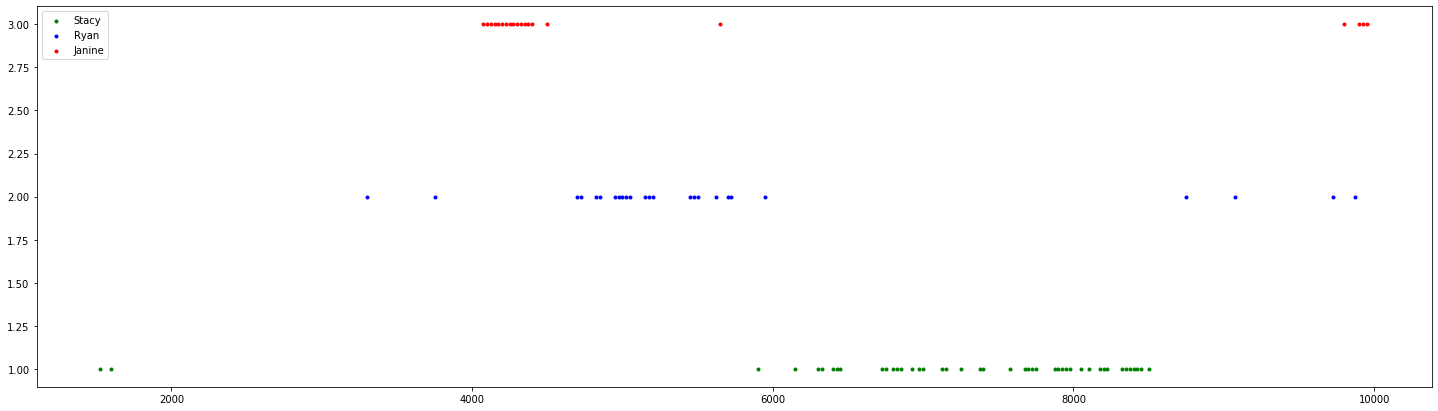

In [200]:
appearances = {'Stacey Branning':[], 'Ryan Malloy':[], 'Janine Malloy':[]}
for i, e in df_cut[df_cut.file == '5555360238519252381.mp4'].iterrows():
    if e['frame'] < 10000:
        appearances[e['character']].append(e['frame'])

fig, ax = plt.subplots(figsize=(25,7))

ax.scatter(appearances['Stacey Branning'], [1]*len(appearances['Stacey Branning']), marker='.',
        color='green',  label='Stacy')
ax.scatter(appearances['Ryan Malloy'], [2]*len(appearances['Ryan Malloy']),marker='.',
        color='blue',  label='Ryan')
ax.scatter(appearances['Janine Malloy'], [3]*len(appearances['Janine Malloy']), marker='.',
        color='red', label='Janine')

ax.legend()
plt.show()

In [36]:
cut = 0.7
keep = 2
add = 2

In [37]:
df_cut = df[df.confidence > cut]

In [38]:
df_cut

,file,confidence,frame,second,character
1,5555360238519252381.mp4,0.718986,1600,64.0,Stacey Branning
55,5555360238519252381.mp4,0.811733,4075,163.0,Janine Malloy
56,5555360238519252381.mp4,0.814773,4100,164.0,Janine Malloy
57,5555360238519252381.mp4,0.840510,4125,165.0,Janine Malloy
58,5555360238519252381.mp4,0.853150,4150,166.0,Janine Malloy
...,...,...,...,...,...
63259,5539381671692122744.mp4,0.759166,169200,6768.0,Stacey Branning
63262,5539381671692122744.mp4,0.792062,169275,6771.0,Stacey Branning
63274,5539381671692122744.mp4,0.751881,169575,6783.0,Stacey Branning
63275,5539381671692122744.mp4,0.703881,169600,6784.0,Stacey Branning


In [44]:
recs = {f:set() for f in df.file.unique()}
kept = {}
for i, e in df_cut.iterrows():
    file = e['file']
    k = find_prev(shots_starts[file], e['second'])
    recs[file].add(k-1)
    recs[file].add(k)
    recs[file].add(k+1)
    
    if (file, k, e['character']) not in kept:
        kept[(file, k, e['character'])] = []
    kept[(file, k, e['character'])].append(e['confidence'])
    
    if add == 2: 
        recs[file].add(k-2)
        recs[file].add(k+2)
        
    # if len(recs[file]) < 4:
    #    print(file, e['second'], k, recs[file])

In [48]:
kept[('5555360238519252381.mp4', 19, 'Stacey Branning')]

[0.7189864598741409]

In [51]:
data_kept = []
for k in kept:
    file, shot_id, character = k
    data_kept.append((file, shot_id, character, sum(kept[k])/len(kept[k])))

In [52]:
df_kept = pd.DataFrame(data_kept, columns=['file', 'shot_id', 'character', 'avg_confidence'])

In [53]:
df_kept

,file,shot_id,character,avg_confidence
0,5555360238519252381.mp4,19,Stacey Branning,0.718986
1,5555360238519252381.mp4,36,Janine Malloy,0.833666
2,5555360238519252381.mp4,38,Janine Malloy,0.877764
3,5555360238519252381.mp4,42,Ryan Malloy,0.823699
4,5555360238519252381.mp4,46,Ryan Malloy,0.837216
...,...,...,...,...
3416,5539381671692122744.mp4,1950,Stacey Branning,0.847670
3417,5539381671692122744.mp4,1952,Stacey Branning,0.742492
3418,5539381671692122744.mp4,1954,Stacey Branning,0.792062
3419,5539381671692122744.mp4,1960,Stacey Branning,0.727881


In [54]:
df_kept.to_csv('chosen_segments_0.7.csv')

In [14]:
segs = {}
for file in recs:
    seg_start = 0
    segs[file] = []
    sorted_ids = list(recs[file])
    if seg_start == 0:
        seg_start = sorted_ids[0]
        cur = sorted_ids[0]
    
    for i, e in enumerate(sorted_ids[1:]):
        if e == cur + 1:
            cur += 1
        elif i == len(recs) - 1 and e == cur + 1:
            segs[file].append((seg_start, e))
        else:
            if cur - seg_start > (0 if keep == 'all' else (keep * 2 + 1)):
                segs[file].append((seg_start, cur))
            seg_start = e
            cur = e

In [20]:
segs['5555360238519252381.mp4']

[(34, 61),
 (69, 78),
 (82, 92),
 (112, 118),
 (133, 165),
 (177, 202),
 (244, 251),
 (256, 262),
 (293, 301),
 (306, 320),
 (328, 339),
 (341, 347),
 (355, 372),
 (389, 397),
 (427, 441),
 (443, 465),
 (506, 515),
 (517, 538),
 (553, 564),
 (576, 587),
 (591, 604),
 (727, 735),
 (737, 746),
 (820, 831),
 (863, 882),
 (887, 893),
 (897, 931),
 (995, 1004),
 (1014, 1035),
 (1041, 1047),
 (1296, 1309),
 (1437, 1462),
 (1468, 1481),
 (1484, 1490),
 (1634, 1665)]

In [15]:
# if I keep everything
s = """5555360238519252381.mp4 100
5531550228324592939.mp4 128
5544620672795594434.mp4 31
5547193787702629969.mp4 96
5549784941472309008.mp4 100
5552368364300855101.mp4 108
5555325449284154780.mp4 89
5534228999422914578.mp4 129
5542003749222140011.mp4 87
5544574287152993687.mp4 100
5539381671692122744.mp4 117"""
# print(s)
print(sum([len(segs[ep]) for ep in segs]))

416


In [16]:
timed_segs = {}
for ep in segs:
    timed_segs[ep] = []
    print(ep)
    for s, e in segs[ep]:
        try:
            timed_segs[ep].append((shots_starts[ep][s], shots_ends[ep][e]))
        except Exception as ex:
            print('@', ep, s, e)
            print(str(ex))

5555360238519252381.mp4
5531550228324592939.mp4
5544620672795594434.mp4
5547193787702629969.mp4
5549784941472309008.mp4
5552368364300855101.mp4
5555325449284154780.mp4
5534228999422914578.mp4
5542003749222140011.mp4
5544574287152993687.mp4
5539381671692122744.mp4


In [19]:
timed_segs['5531550228324592939.mp4']

[(96.22, 139.08),
 (186.13, 217.06),
 (244.21, 257.15),
 (355.08, 432.2),
 (495.05, 514.15),
 (520.06, 545.11),
 (548.23, 576.05),
 (604.15, 659.18),
 (689.18, 846.05),
 (1020.05, 1035.11),
 (1049.13, 1098.02),
 (1113.24, 1151.16),
 (1154.23, 1175.04),
 (1249.17, 1264.19),
 (1265.22, 1299.05),
 (1319.16, 1335.11),
 (1382.0, 1422.1),
 (1436.02, 1505.1),
 (1545.05, 1602.16),
 (1648.24, 1670.02),
 (1716.22, 1758.22),
 (1851.1, 1958.12),
 (2051.07, 2070.14),
 (2086.23, 2130.09),
 (2215.12, 2330.06),
 (2464.12, 2505.14),
 (2507.02, 2556.1),
 (2559.06, 2575.02),
 (2576.14, 2617.06),
 (2658.24, 2677.16),
 (2679.06, 2843.06),
 (3032.01, 3082.17),
 (3143.21, 3321.09),
 (3367.07, 3415.2),
 (3463.0, 3477.15),
 (3520.04, 3549.0),
 (3583.03, 3638.23),
 (3645.14, 3669.17),
 (3735.1, 3780.23),
 (3854.0, 3937.13),
 (4058.03, 4121.04),
 (4163.14, 4187.15),
 (4279.04, 4362.14),
 (4363.18, 4524.13),
 (4562.22, 4600.13),
 (4621.12, 4723.16),
 (4734.24, 4792.23),
 (4815.11, 4891.01),
 (4891.23, 4962.13),
 

In [17]:
segs['5539381671692122744.mp4']

[(60, 68),
 (177, 190),
 (221, 235),
 (238, 246),
 (326, 332),
 (339, 353),
 (364, 383),
 (451, 461),
 (469, 475),
 (517, 531),
 (611, 622),
 (627, 633),
 (674, 682),
 (710, 721),
 (723, 729),
 (778, 800),
 (802, 819),
 (915, 923),
 (1077, 1086),
 (1134, 1141),
 (1406, 1414),
 (1481, 1504),
 (1558, 1581),
 (1583, 1598),
 (1600, 1606),
 (1616, 1632),
 (1647, 1659),
 (1665, 1678),
 (1681, 1694),
 (1709, 1717),
 (1751, 1757),
 (1760, 1768),
 (1870, 1876),
 (1881, 1888),
 (1948, 1956)]

In [18]:
total_segments = 0
total_shots = 0
for ep in segs:
    total_segments += len(segs[ep])
    total_shots += sum([e - s for s, e in segs[ep]])
print('Shots:', total_segs)
print('Segments:', total_mega_segs)

NameError: name 'total_segs' is not defined

In [358]:
pickle.dump(timed_segs, open(f'segs/segments_add{add}_keep{keep}_cut{cut}.pickle', 'wb'))

In [ ]:
pickle.load()